In [15]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/AI/Classification_Model/archive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/AI/Classification_Model/archive
/content/gdrive/MyDrive/AI/Classification_Model/archive
 base_model.h5				     f1.jpg		    sports.csv
 best_version.h5			     golf.jpg		    test
 best_version.keras			     images_prediction	    train
 best_version_v3.h5			     improved_model.keras   updated_model.h5
 best_version_v3.keras			     improved_transfer	    valid
 bowling-300x225.jpg			     improved_transfer.h5
'EfficientNetB0-100-(224 X 224)- 98.40.h5'   sports_100.h5


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import utils,layers,Sequential
import os
import cv2
import seaborn as sns

import matplotlib.pyplot as plt
import math
import random


from tensorflow.python.keras import models, layers, optimizers, utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions






In [11]:
base = "/content/gdrive/MyDrive/AI/Classification_Model/archive"

In [12]:
train_dir = os.path.join(base,'train')
test_dir = os.path.join(base, 'test')
valid_dir = os.path.join(base, 'valid')

train = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(224, 224), seed=42, batch_size=32)
validation = keras.preprocessing.image_dataset_from_directory(valid_dir, image_size=(224, 224), seed=42, batch_size=16)
test = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224, 224), seed=42, batch_size=16)

Found 13635 files belonging to 100 classes.
Found 510 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [13]:
from tensorflow.keras.models import load_model

model = load_model('improved_transfer.h5')


1/1 [==============================] - 0s 281ms/step


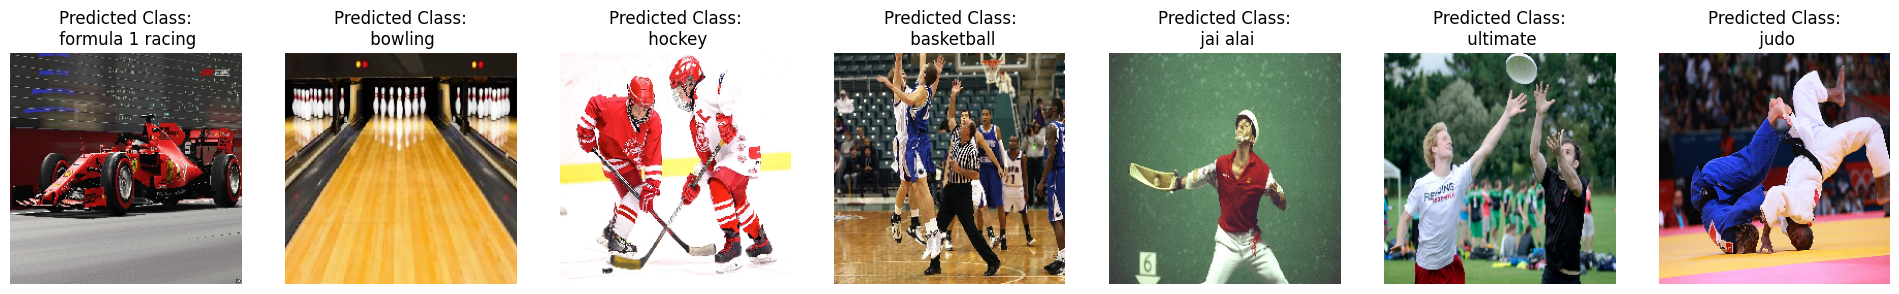

In [16]:
import os

# Define the path to the folder containing the images
folder_path = '/content/gdrive/MyDrive/AI/Classification_Model/archive/images_prediction/'

# Get a list of all the files in the folder
image_files = os.listdir(folder_path)
horizontal_size = len(image_files)*3.5
class_names = train.class_names

# Create a single row of subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(horizontal_size, 3))

# Loop over the image files
for i, image_file in enumerate(image_files):
    # Construct the path to the image file
    image_path = os.path.join(folder_path, image_file)

    # Load the image
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))

    # Preprocess the image
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)

    # Make a prediction
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_name = class_names[class_idx]

    # Plot the image with the predicted label in a separate subplot
    axs[i].imshow(img)
    axs[i].set_title(f'Predicted Class:\n {class_name}')
    axs[i].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.1)

# Show the plot
plt.show()